<a href="https://colab.research.google.com/github/a7me3D/Movies-Recommendation-using-Neural-Network/blob/main/NNMoviesRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [272]:
print("Downloading movielens data...")
from urllib.request import urlretrieve
import zipfile

urlretrieve("https://files.grouplens.org/datasets/movielens/ml-latest-small.zip", "movielens.zip")
zip_ref = zipfile.ZipFile('movielens.zip', "r")
zip_ref.extractall()
print("Done. Dataset contains:")
print(zip_ref.read('ml-latest-small/README.txt'))

Done. Dataset contains:
b'Summary\n=======\n\nThis dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from [MovieLens](http://movielens.org), a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.\n\nUsers were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.\n\nThe data are contained in the files `links.csv`, `movies.csv`, `ratings.csv` and `tags.csv`. More details about the contents and use of all these files follows.\n\nThis is a *development* dataset. As such, it may change over time and is not an appropriate dataset for shared research results. See available *benchmark* datasets if that is your intent.\n\nThis and other GroupL

In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [274]:
ratings_df = pd.read_csv("ml-latest-small/ratings.csv")

In [275]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [276]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [277]:
print(ratings_df.head(5))
print("\n Dataset shape:",ratings_df.shape)

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

 Dataset shape: (100836, 4)


In [278]:
users_count = len(ratings_df["userId"].unique())
print("users count:", users_count)

users count: 610


In [279]:
movies_count = len(ratings_df["movieId"].unique())
print("movies count:", movies_count)

movies count: 9724


In [280]:
movies_df = pd.read_csv("ml-latest-small/movies.csv")

In [281]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [282]:
print(movies_df.head(5))
print("\n Dataset shape:",movies_df.shape)

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

 Dataset shape: (9742, 3)


In [283]:
movies_count = len(movies_df["movieId"].unique())
print("movies count:", movies_count)

movies count: 9742


In [284]:
movies_df['genres'] = movies_df['genres'].apply(lambda x: x.split('|'))

In [285]:
movies_genre_lenght =  pd.Series(map(lambda genre_list: len(genre_list) , movies_df['genres']))
movies_genre_lenght.value_counts()

2     3218
1     2851
3     2338
4      987
5      271
6       63
7       12
8        1
10       1
dtype: int64

In [286]:
df = movies_df.merge(on="movieId", right=ratings_df)

In [287]:
df.head(5)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1,4.0,964982703
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",5,4.0,847434962
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",7,4.5,1106635946
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",15,2.5,1510577970
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",17,4.5,1305696483


In [288]:
df.drop(columns=["timestamp"])

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1,4.0
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",5,4.0
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",7,4.5
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",15,2.5
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",17,4.5
...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]",184,4.0
100832,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]",184,3.5
100833,193585,Flint (2017),[Drama],184,3.5
100834,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]",184,3.5


In [289]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

In [290]:
genres_list = set(df['genres'].explode().str.strip())

In [291]:
mlb = MultiLabelBinarizer()

In [292]:
genre_matrix = mlb.fit_transform(df['genres'].apply(lambda genres: genres))

In [293]:
mlb.classes_

array(['(no genres listed)', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'], dtype=object)

In [294]:
X_train, X_test, y_train, y_test = train_test_split(genre_matrix, df[['rating']], test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [295]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding, Flatten, Dropout
from tensorflow.keras.metrics import RootMeanSquaredError


In [296]:
model = Sequential([
  Embedding(input_dim=len(genres_list), output_dim=64, input_length=len(genres_list)),
  Flatten(),
  Dense(128, activation='relu'),
  Dropout(0.2),
  Dense(64, activation='relu'),
  Dropout(0.2),
  Dense(1, activation='linear')
])

In [297]:
model.compile(loss='mse', optimizer='adam', metrics=[RootMeanSquaredError()])

In [345]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1773/1773 [==============================] - 14s 8ms/step - loss: 1.0190 - root_mean_squared_error: 1.0094 - val_loss: 1.0084 - val_root_mean_squared_error: 1.0042
Epoch 2/10
1773/1773 [==============================] - 12s 7ms/step - loss: 1.0187 - root_mean_squared_error: 1.0093 - val_loss: 1.0075 - val_root_mean_squared_error: 1.0037
Epoch 3/10
1773/1773 [==============================] - 12s 7ms/step - loss: 1.0182 - root_mean_squared_error: 1.0090 - val_loss: 1.0073 - val_root_mean_squared_error: 1.0036
Epoch 4/10
1773/1773 [==============================] - 12s 7ms/step - loss: 1.0158 - root_mean_squared_error: 1.0079 - val_loss: 1.0057 - val_root_mean_squared_error: 1.0029
Epoch 5/10
1773/1773 [==============================] - 12s 7ms/step - loss: 1.0152 - root_mean_squared_error: 1.0076 - val_loss: 1.0082 - val_root_mean_squared_error: 1.0041
Epoch 6/10
1773/1773 [==============================] - 12s 7ms/step - loss: 1.0140 - root_mean_squared_error: 1.0070 - val_l

In [346]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 20, 64)            1280      
                                                                 
 flatten_5 (Flatten)         (None, 1280)              0         
                                                                 
 dense_17 (Dense)            (None, 128)               163968    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                

In [347]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

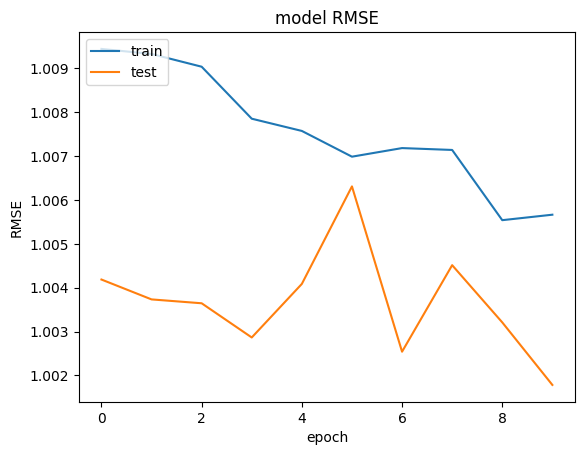

In [349]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model RMSE')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

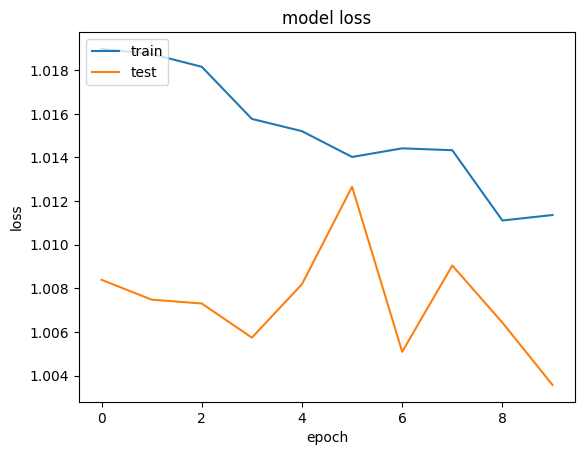

In [350]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [319]:
user_id = 1

user_ratings = df[df['userId'] == user_id]
unrated_movies = df.loc[~(df['userId'] == user_id)]

In [320]:
user_ratings.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1,4.0,964982703
325,3,Grumpier Old Men (1995),"[Comedy, Romance]",1,4.0,964981247
433,6,Heat (1995),"[Action, Crime, Thriller]",1,4.0,964982224
2107,47,Seven (a.k.a. Se7en) (1995),"[Mystery, Thriller]",1,5.0,964983815
2379,50,"Usual Suspects, The (1995)","[Crime, Mystery, Thriller]",1,5.0,964982931


In [321]:
unrated_movies.sort_values(by='rating', ascending=False)

,movieId,title,genres,userId,rating,timestamp
37918,2002,Lethal Weapon 3 (1992),"[Action, Comedy, Crime, Drama]",594,5.0,1108975130
15476,588,Aladdin (1992),"[Adventure, Animation, Children, Comedy, Musical]",20,5.0,1054038059
15483,588,Aladdin (1992),"[Adventure, Animation, Children, Comedy, Musical]",43,5.0,848993660
49956,2959,Fight Club (1999),"[Action, Crime, Drama, Thriller]",356,5.0,1229142810
31381,1394,Raising Arizona (1987),[Comedy],547,5.0,942723440
...,...,...,...,...,...,...
72790,6888,Scary Movie 3 (2003),"[Comedy, Horror]",18,0.5,1455050979
99341,141668,War Room (2015),[Drama],567,0.5,1525290011
47332,2720,Inspector Gadget (1999),"[Action, Adventure, Children, Comedy]",552,0.5,1112151437
32056,1485,Liar Liar (1997),[Comedy],153,0.5,1525552506


In [322]:
X_test_unrated = genre_matrix[unrated_movies.index]

In [323]:
predicted_ratings = model.predict(X_test_unrated)

3144/3144 [==============================] - 7s 2ms/step


In [324]:
predicted_ratings = predicted_ratings.flatten()
predicted_ratings

array([3.8565178, 3.8565178, 3.8565178, ..., 3.6653225, 3.6049292,
       3.2355711], dtype=float32)

In [325]:
unrated_movies["predicted_rating"] = predicted_ratings

<ipython-input-325-b5eabdc9344a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unrated_movies["predicted_rating"] = predicted_ratings


In [326]:
recommended_movies = unrated_movies.sort_values(by='predicted_rating', ascending=False)

In [327]:
recommended_movies

,movieId,title,genres,userId,rating,timestamp,predicted_rating
81467,41527,Paradise Now (2005),"[Crime, Drama, Thriller, War]",474,4.0,1144882716,4.508930
81466,41527,Paradise Now (2005),"[Crime, Drama, Thriller, War]",414,4.0,1145900925,4.508930
71636,6567,Buffalo Soldiers (2001),"[Comedy, Crime, Drama, War]",610,3.0,1493849834,4.408802
71634,6567,Buffalo Soldiers (2001),"[Comedy, Crime, Drama, War]",34,3.5,1166464142,4.408802
71635,6567,Buffalo Soldiers (2001),"[Comedy, Crime, Drama, War]",414,4.0,1075733630,4.408802
...,...,...,...,...,...,...,...
5272,181,Mighty Morphin Power Rangers: The Movie (1995),"[Action, Children]",599,1.0,1519175718,1.653049
5265,181,Mighty Morphin Power Rangers: The Movie (1995),"[Action, Children]",234,2.0,1004408768,1.653049
5275,181,Mighty Morphin Power Rangers: The Movie (1995),"[Action, Children]",608,0.5,1117415643,1.653049
5269,181,Mighty Morphin Power Rangers: The Movie (1995),"[Action, Children]",373,1.0,846830349,1.653049


In [328]:
recommended_movies = recommended_movies.drop_duplicates(subset='title', keep='first')
recommended_movies.head(5)

,movieId,title,genres,userId,rating,timestamp,predicted_rating
81467,41527,Paradise Now (2005),"[Crime, Drama, Thriller, War]",474,4.0,1144882716,4.508930
71636,6567,Buffalo Soldiers (2001),"[Comedy, Crime, Drama, War]",610,3.0,1493849834,4.408802
28506,1267,"Manchurian Candidate, The (1962)","[Crime, Thriller, War]",156,4.0,946798252,4.371254
21233,930,Notorious (1946),"[Film-Noir, Romance, Thriller]",290,4.0,974938272,4.368659
20979,922,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),"[Drama, Film-Noir, Romance]",59,4.0,953609611,4.285242
